### Import libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

### Initialize dataframe

In [9]:
df = pd.read_csv('./uk-nutrition-data.csv', index_col='Product')
df

,England,Northern Ireland,Scotland,Wales
Product,,,,
Alcoholic drinks,375,135,458,475
Beverages,57,47,53,73
Meat,245,267,242,227
Cereals,1472,1494,1462,1582
Cheese,105,66,103,103
Sweets,54,41,62,64
Fats and oils,193,209,184,235
Fish,147,93,122,160
Fresh fruit,1102,674,957,1137


**Transposing the dataframe**

In [10]:
transposed_df = df.T
transposed_df

Product,Alcoholic drinks,Beverages,Meat,Cereals,Cheese,Sweets,Fats and oils,Fish,Fresh fruit,Fresh potatoes,Fresh veggies,Other meat,Other veggies,Processed potatoes,Processed veggies,Soft drinks,Sugars
England,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
Northern Ireland,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
Scotland,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
Wales,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175


**Heatmap for visualization**

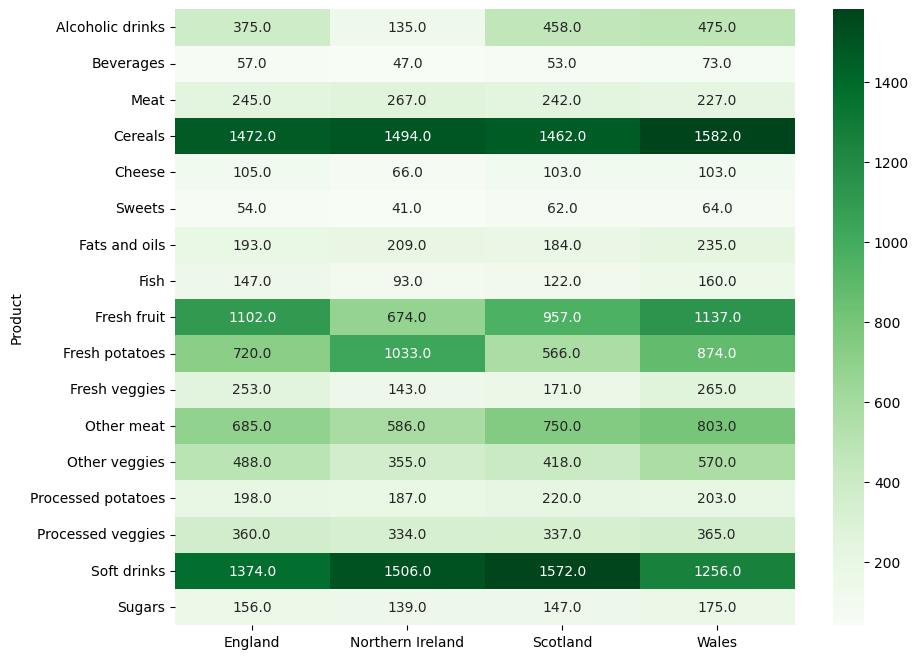

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=df, annot=True, cmap='Greens', fmt='.1f')
plt.show()

### Encoding the data

In [21]:
encoder = Sequential()
encoder.add(Dense(8, activation='relu', input_shape=[17]))
encoder.add(Dense(4, activation='relu'))
encoder.add(Dense(2, activation='relu'))

In [23]:
decoder = Sequential()
decoder.add(Dense(4, activation='relu', input_shape=[2]))
decoder.add(Dense(8, activation='relu'))
decoder.add(Dense(17, activation='relu'))

In [24]:
autoencoder = Sequential([encoder, decoder])

In [25]:
autoencoder.compile(loss='mse', optimizer=SGD(learning_rate=1.5))

In [27]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.T.values)

In [28]:
scaled_df.shape

(4, 17)

In [29]:
autoencoder.fit(scaled_df, scaled_df, epochs=15)

Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 0.4093
Epoch 2/15
1/1 [==============================] - 0s 15ms/step - loss: 0.2963
Epoch 3/15
1/1 [==============================] - 0s 15ms/step - loss: 0.2674
Epoch 4/15
1/1 [==============================] - 0s 15ms/step - loss: 0.2780
Epoch 5/15
1/1 [==============================] - 0s 15ms/step - loss: 0.2440
Epoch 6/15
1/1 [==============================] - 0s 14ms/step - loss: 0.2672
Epoch 7/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2357
Epoch 8/15
1/1 [==============================] - 0s 11ms/step - loss: 0.2456
Epoch 9/15
1/1 [==============================] - 0s 14ms/step - loss: 0.2355
Epoch 10/15
1/1 [==============================] - 0s 60ms/step - loss: 0.2673
Epoch 11/15
1/1 [==============================] - 0s 20ms/step - loss: 0.2186
Epoch 12/15
1/1 [==============================] - 0s 10ms/step - loss: 0.2162
Epoch 13/15
1/1 [==============================] - 0s 12ms/step

In [30]:
encoded_2D = encoder.predict(scaled_df)
encoded_2D

1/1 [==============================] - 0s 145ms/step


array([[0.80687565, 1.3509425 ],
       [0.        , 0.        ],
       [0.39879036, 0.4156735 ],
       [1.1896968 , 2.2373638 ]], dtype=float32)

In [31]:
df.T.index

Index(['England', 'Northern Ireland', 'Scotland', 'Wales'], dtype='object')

In [36]:
results = pd.DataFrame(data=encoded_2D, index=df.T.index, columns=['C1', 'C2'])

In [37]:
results = results.reset_index()
results

,index,C1,C2
0,England,0.806876,1.350942
1,Northern Ireland,0.000000,0.000000
2,Scotland,0.398790,0.415673
3,Wales,1.189697,2.237364


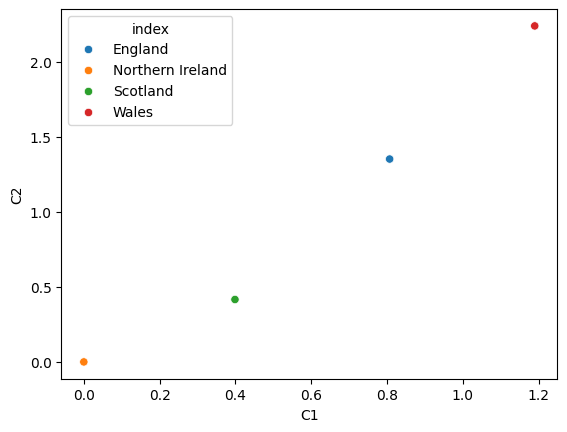

In [38]:
sns.scatterplot(x='C1', y='C2', data=results, hue='index')
plt.show()